<h3><u><font color='Purple'>Sales Analysis of AAL company using year 2020 Q4 sales data</font></u></h3>

In [2]:
import pandas as pd

#Importing data. Reading CSV file
df = pd.read_csv('AusApparalSales4thQrt2020.csv')
#Printing top 5 rows
print(df.head(5))

         Date        Time State     Group  Unit  Sales
0  1-Oct-2020     Morning    WA      Kids     8  20000
1  1-Oct-2020     Morning    WA       Men     8  20000
2  1-Oct-2020     Morning    WA     Women     4  10000
3  1-Oct-2020     Morning    WA   Seniors    15  37500
4  1-Oct-2020   Afternoon    WA      Kids     3   7500


<b>Question:</b>
<h4> 1. <u> Data Wrangling</u></h4>
<p> a) Ensure that the data is clean and that there is no missing or incorrect data. 
    ○ Inspect the data manually for missing/incorrect data using the functions isna(), and notna().</p>
<p> b) Based on your knowledge of Data Analytics, include your recommendations for treating missing data and incorrect data. (dropping the null values or filling them).<p>
<p> c) Select an appropriate Data Wrangling approach —  data standardization or data normalization. Perform the standardization or normalization and present the data. (Normalization is the preferred approach for this problem.)<p>
<p> d) Share your recommendation on the usage of the groupby() function for data chunking or merging.<p>

<h5> a) Checking for missing data <h5>

In [3]:
#Step 1: Data Wrangling

# Checking for missing data
print("Column wise count of fields which has missing data --")
print(df.isna().sum())

Column wise count of fields which has missing data --
Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


In [5]:
print("Column wise count of fields which are filled --")
print(df.notna().sum())

Column wise count of fields which are filled --
Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64


In [6]:
count = 0
for col in df.columns: 
    if df[col].notna().sum() != len(df[col]):
        count +=1
if count != 0:
    print("Number of fields which are not NA", count)
else:
    print("All fields are filled")  

All fields are filled


In [7]:
#Checking for duplicate date
df.duplicated().sum()

0

<ol><b><font color='blue'>Result of a)</font></b>: 
<li>No missing data found.</li>
<li>No incorrect data found.</li>
<li>No Duplicate data found.</li></ol>

<h5><font color='blue'> b) My recommendation: </font></h5>
<ul>
    <li>Dropping a row which has has incorrect or irrelevant data entry.</li>
    <li>Missing entry can be filled by mean if column datatype is numeric otherwise most frequent value (mode) for string column datatype could be used. </li>
</ul>

<h5> c) Data Standartization or Normalization </h5>

In [8]:
print(df.dtypes['Date'])

object


In [9]:
#Converting datatype of 'Date' column to datetype
df['Date'] = pd.to_datetime(df['Date'])
print(df.dtypes['Date'])

datetime64[ns]


In [10]:
#Normalizing 'Sales' column
import numpy as np
df['Sales_log'] = df['Sales'].apply(lambda x: np.log(x))
df.head()

,Date,Time,State,Group,Unit,Sales,Sales_log
0,2020-10-01,Morning,WA,Kids,8,20000,9.903488
1,2020-10-01,Morning,WA,Men,8,20000,9.903488
2,2020-10-01,Morning,WA,Women,4,10000,9.210340
3,2020-10-01,Morning,WA,Seniors,15,37500,10.532096
4,2020-10-01,Afternoon,WA,Kids,3,7500,8.922658


<h5> d) Groupby function for Data Chunking or Merging </h5> 

In [11]:
#Getting sum of entire quarter sales for each state using groupby function
df.groupby('State')['Sales'].sum()

State
 NSW     74970000
 NT      22580000
 QLD     33417500
 SA      58857500
 TAS     22760000
 VIC    105565000
 WA      22152500
Name: Sales, dtype: int64

In [12]:
#Getting max sales in each group using groupby function
df.groupby('Group')['Sales'].max()

Group
 Kids       162500
 Men        160000
 Seniors    162500
 Women      162500
Name: Sales, dtype: int64

In [13]:
#Grouping the data with state and group and fetching data of 'Kids' in 'New South Wales' state. 
gr = df.groupby(['State', 'Group'])
print(gr.get_group((' NSW', ' Kids')))

           Date        Time State  Group  Unit   Sales  Sales_log
60   2020-10-01     Morning   NSW   Kids    39   97500  11.487608
64   2020-10-01   Afternoon   NSW   Kids    40  100000  11.512925
68   2020-10-01     Evening   NSW   Kids    22   55000  10.915088
144  2020-10-02     Morning   NSW   Kids    32   80000  11.289782
148  2020-10-02   Afternoon   NSW   Kids    33   82500  11.320554
...         ...         ...   ...    ...   ...     ...        ...
7456 2020-12-29   Afternoon   NSW   Kids    34   85000  11.350407
7460 2020-12-29     Evening   NSW   Kids    40  100000  11.512925
7536 2020-12-30     Morning   NSW   Kids    27   67500  11.119883
7540 2020-12-30   Afternoon   NSW   Kids    35   87500  11.379394
7544 2020-12-30     Evening   NSW   Kids    37   92500  11.434964

[270 rows x 7 columns]


<tr></tr>

<b>Questing 2</b>
<h4>2. <u> Data Analysis </u></h4>
<p>a) Perform descriptive statistical analysis on the data (Sales and Unit columns) (Techniques such as mean, median, mode and standard deviation can be used.). </p>
<p>b) Determine which group is generating the highest sales, and which group is generating the lowest sales.</p>
<p>c) Determine which state is generating the highest sales, and which state is generating the lowest sales.</p>
<p>d) Generate weekly, monthly and quarterly reports for the analysis made.<p>
(Use suitable libraries such as NumPy, Pandas, SciPy etc. for performing the analysis.)


<h5> a) Finding Mean, Standard Deviation and other stats of 'Sales' and 'Unit' column </h5>

In [53]:
df[['Sales', 'Unit']].describe()

,Sales,Unit
count,7560.000000,7560.000000
mean,45013.558201,18.005423
std,32253.506944,12.901403
min,5000.000000,2.000000
25%,20000.000000,8.000000
50%,35000.000000,14.000000
75%,65000.000000,26.000000
max,162500.000000,65.000000


<h5> b) Determine which group is generating the highest sales, and which group is generating the lowest sales </h5>

In [14]:
#Sales of Groups 
print(df.groupby('Group')['Sales'].sum())
#Finding Maximum sales by group
print("\nMaximum sales by group:{0}".format(df.groupby('Group')['Sales'].sum().idxmax()))
print("Total sales by group {0} is {1}".format(df.groupby('Group')['Sales'].sum().idxmax(), df.groupby('Group')['Sales'].sum().max()))

Group
 Kids       85072500
 Men        85750000
 Seniors    84037500
 Women      85442500
Name: Sales, dtype: int64

Maximum sales by group: Men
Total sales by group  Men is 85750000


<h5> c) Determine which state is generating the highest sales, and which state is generating the lowest sales. </h5>

In [15]:
#Sales of States 
print(df.groupby('State')['Sales'].sum())
#Finding Maximum sales by state
print("\nMaximum sales by State:{0}".format(df.groupby('State')['Sales'].sum().idxmax()))
print("Total sales by State {0} is {1}".format(df.groupby('State')['Sales'].sum().idxmax(), df.groupby('State')['Sales'].sum().max()))

State
 NSW     74970000
 NT      22580000
 QLD     33417500
 SA      58857500
 TAS     22760000
 VIC    105565000
 WA      22152500
Name: Sales, dtype: int64

Maximum sales by State: VIC
Total sales by State  VIC is 105565000


<h5> d) Generate weekly, monthly and quarterly reports for the analysis made.</h5>

In [39]:
#Adding column for month, quarter and week of the year
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Quarter'] = pd.to_datetime(df['Date']).dt.quarter
df['Week_of_Year'] = pd.to_datetime(df['Date']).dt.isocalendar().week
#printing resulting dataset
df

,Date,Time,State,Group,Unit,Sales,Sales_log,Month,Quarter,Week_of_Year
0,2020-10-01,Morning,WA,Kids,8,20000,9.903488,10,4,40
1,2020-10-01,Morning,WA,Men,8,20000,9.903488,10,4,40
2,2020-10-01,Morning,WA,Women,4,10000,9.210340,10,4,40
3,2020-10-01,Morning,WA,Seniors,15,37500,10.532096,10,4,40
4,2020-10-01,Afternoon,WA,Kids,3,7500,8.922658,10,4,40
...,...,...,...,...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000,10.463103,12,4,53
7556,2020-12-30,Evening,TAS,Kids,15,37500,10.532096,12,4,53
7557,2020-12-30,Evening,TAS,Men,15,37500,10.532096,12,4,53
7558,2020-12-30,Evening,TAS,Women,11,27500,10.221941,12,4,53


In [35]:
#Finding average weekly sales 
print("Average weekly sales report: \n")
print(df.groupby('Week_of_Year')['Sales'].mean())

Average weekly sales report: 

Week_of_Year
40    44776.785714
41    45922.619048
42    45306.122449
43    45603.741497
44    43268.849206
45    35484.693878
46    36007.653061
47    35905.612245
48    36526.360544
49    50378.401361
50    53613.945578
51    53835.034014
52    54030.612245
53    54732.142857
Name: Sales, dtype: float64


In [36]:
#Finding average Yearly sales 
print("Average monthly sales report:\n")
print(df.groupby('Month')['Sales'].mean())

Average monthly sales report:

Month
10    45353.174603
11    35985.119048
12    53702.380952
Name: Sales, dtype: float64


In [37]:
#Finding average Quarterly sales 
print("Average Quarterly sales report:\n")
print(df.groupby('Quarter')['Sales'].mean())

Average Quarterly sales report:

Quarter
4    45013.558201
Name: Sales, dtype: float64


<h4>3 & 4. <u> Data Visualization & Reporting </u></h4>
<p> <ul>● Use appropriate data visualization libraries to build a dashboard for the Head of S&M that includes for the key parameters like 
    <li> State-wise sales analysis for different groups (kids, women, men, and seniors) </li>
    <li> Group-wise sales analysis (kids, women, men, and seniors) across different states. </li>
    <li> Time-of-the-day analysis: during which time of the day are sales the highest, and during which time are sales the lowest? [This helps S&M teams design programs for increasing sales such as hyper-personalization and Next Best Offers].
The dashboard must contain daily, weekly, monthly and quarterly charts. </li></ul>
 (Any visualization library can be used for this purpose. However, since statistical analysis is being done, Seaborn is preferred.) </p>


In [57]:
#Australian Apparal Sales 2020 4th Quater data
df.head()

,Date,Time,State,Group,Unit,Sales,Sales_log,Month,Quarter,Week_of_Year
0,2020-10-01,Morning,WA,Kids,8,20000,9.903488,10,4,40
1,2020-10-01,Morning,WA,Men,8,20000,9.903488,10,4,40
2,2020-10-01,Morning,WA,Women,4,10000,9.210340,10,4,40
3,2020-10-01,Morning,WA,Seniors,15,37500,10.532096,10,4,40
4,2020-10-01,Afternoon,WA,Kids,3,7500,8.922658,10,4,40


<h4> <font color='blue'> Choosing Seaborn library for data visualization. Seaborn are easy to use, simple syntax and few of its built themes and color palettes makes it more visually appealing compared to matplotlib.  </font> </h4>

<h5>State-wise sales analysis for different groups (kids, women, men, and seniors) </h5>

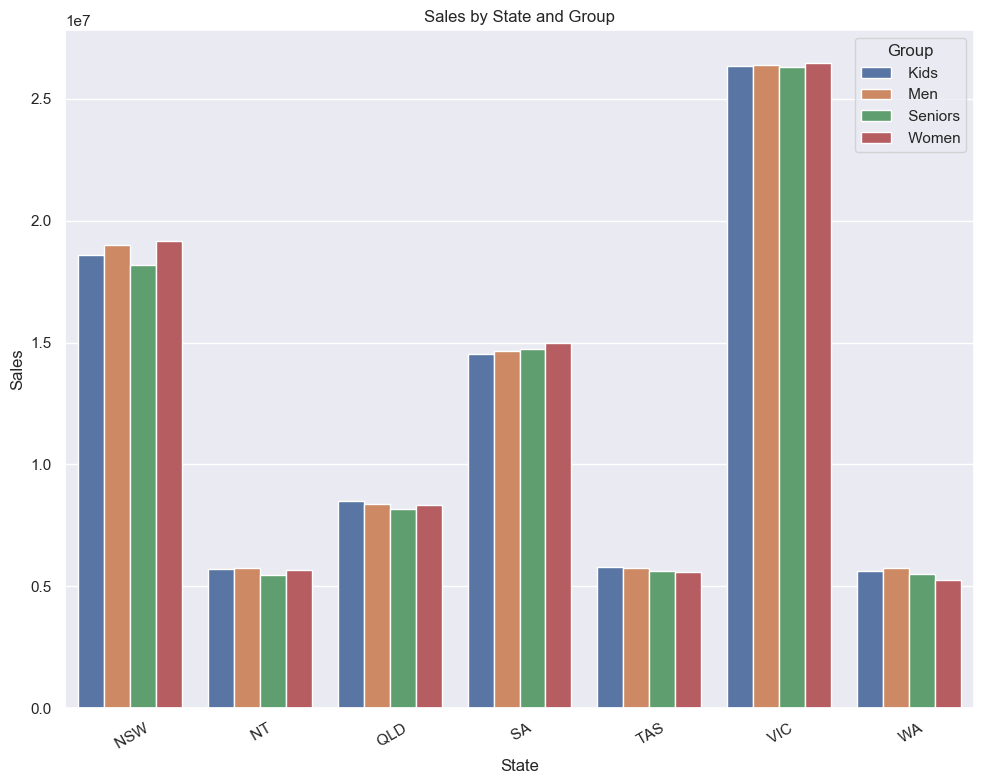

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Seaborn defining theme and style
sns.set_theme()
sns.set_style('darkgrid')
# Grouped by 'State' and 'Group' and calculating the sum of 'Sales'
grouped_data = df.groupby(['State', 'Group'])['Sales'].sum().reset_index()
plt.figure(figsize=(10, 8))
#Barplotting the data. 
sns.barplot(data=grouped_data, x='State', y='Sales', hue='Group')

plt.title('Sales by State and Group')
plt.xlabel('State')
plt.ylabel('Sales')
plt.xticks(rotation=30)
plt.legend(title='Group')
plt.tight_layout()
plt.show()


<h5><font color='green'><u> Inference from above chart: </u></font></h5>
<ol>
    <li>From the above plot, it is evident that Victoria State is having highest sales for all groups/section</li>
    <li>From the above plot, most of the states have more sales in women appreal than for any other group</li>
</ol>

<h5> Group-wise sales analysis (kids, women, men, and seniors) across different states. </h5>

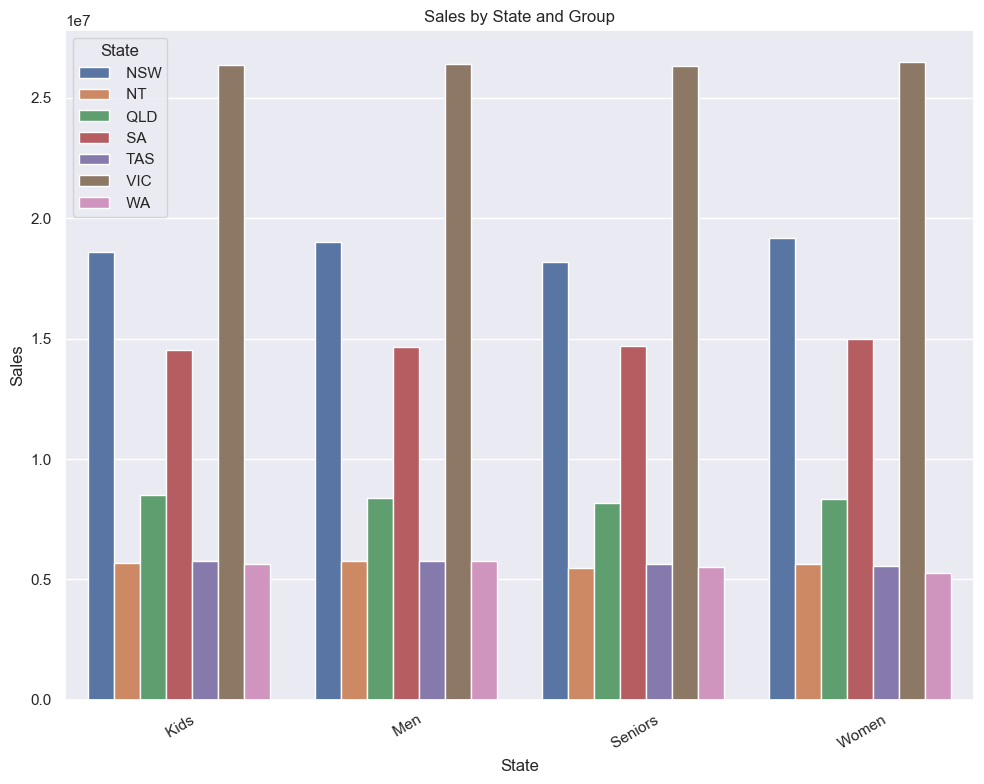

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Seaborn defining theme and style
sns.set_theme()
sns.set_style('darkgrid')

# Grouped by 'State' and 'Group' and calculating the sum of 'Sales'
grouped_data = df.groupby(['State', 'Group'])['Sales'].sum().reset_index()
plt.figure(figsize=(10, 8))
#Barplotting the data. 
sns.barplot(data=grouped_data, x='Group', y='Sales', hue='State')

plt.title('Sales by State and Group')
plt.xlabel('State')
plt.ylabel('Sales')
plt.xticks(rotation=30)
plt.legend(title='State')
plt.tight_layout()
plt.show()


<h5><font color='green'><u> Inference from above chart: </u></font></h5>
<ol>
    <li>From the above plot, it is evident that Victoria State is having highest sales for all groups/section. Followed by New South Wales and then South Australia.</li>
    <li>From the above plot, slaes of different group appreal in a given state is more or less same.</li>
</ol>

<h5> Time-of-the-day analysis: during which time of the day are sales the highest, and during which time are sales the lowest?</h5>

In [61]:
# Total sales by time 
df.groupby(['Time'])['Sales'].sum()

Time
 Afternoon    114007500
 Evening      112087500
 Morning      114207500
Name: Sales, dtype: int64

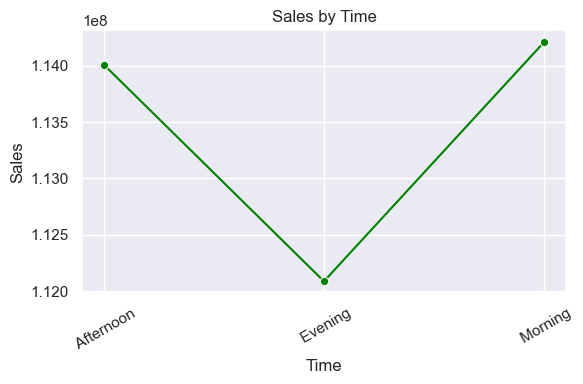

In [62]:
#Plotting chart
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Seaborn defining theme and style
sns.set_theme()
sns.set_style('darkgrid')

plt.figure(figsize=(6, 4))
# Grouped by 'State' and 'Group' and calculating the sum of 'Sales'
time_sales = df.groupby('Time')['Sales'].sum().reset_index()

#Barplotting the data. 
sns.lineplot(data=time_sales, x='Time', y='Sales', marker="o", color = 'green')

plt.title('Sales by Time')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

<h5><font color='green'><u> Inference from above chart: </u></font></h5>
<ul>
    <li>From the above plot, it appears the <b> maximum sales </b>is happening in <b>'Morning' </b> time and <b> minimum sales </b> happens during <b> 'Evening' time </b>. Based on this company can make strategy a) To have enough staffing during morning hours. b) Make plans on how to increase evening sales. </li>
</ul>

<h5> Daily, weekly, monthly and quarterly sales charts </h5>

In [28]:
#Sales by months 

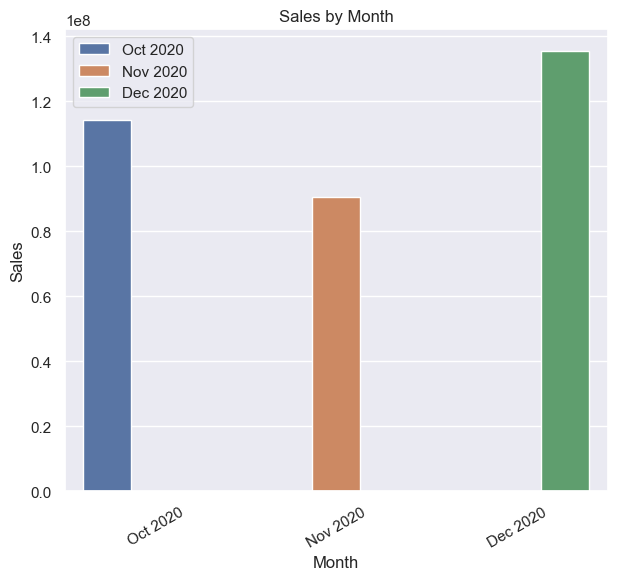

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Seaborn defining theme and style
sns.set_theme()
sns.set_style('darkgrid')

# Grouped by 'State' and 'Group' and calculating the sum of 'Sales'
grouped_data = df.groupby(['Month'])['Sales'].sum().reset_index()
plt.figure(figsize=(7, 6))
#Barplotting the data.
plt.title('Sales by Month')
plt.xlabel('State')
plt.ylabel('Sales')
plt.xticks(rotation=30)

# Rename x-axis labels
new_labels = ['Oct 2020', 'Nov 2020', 'Dec 2020']
sns.barplot(data=grouped_data, x='Month', y='Sales', hue=new_labels)
plt.gca().set_xticklabels(new_labels)
plt.show()


<h5><font color='green'><u> Inference from above chart: </u></font></h5>
<ul>
    <li>From the above plot, the sales for month of <b> December </b> was the highest. Christmas and New year could be the possible reason for high sales in december compared to other months.</li>
</ul>

In [29]:
#Sales by Week of the year

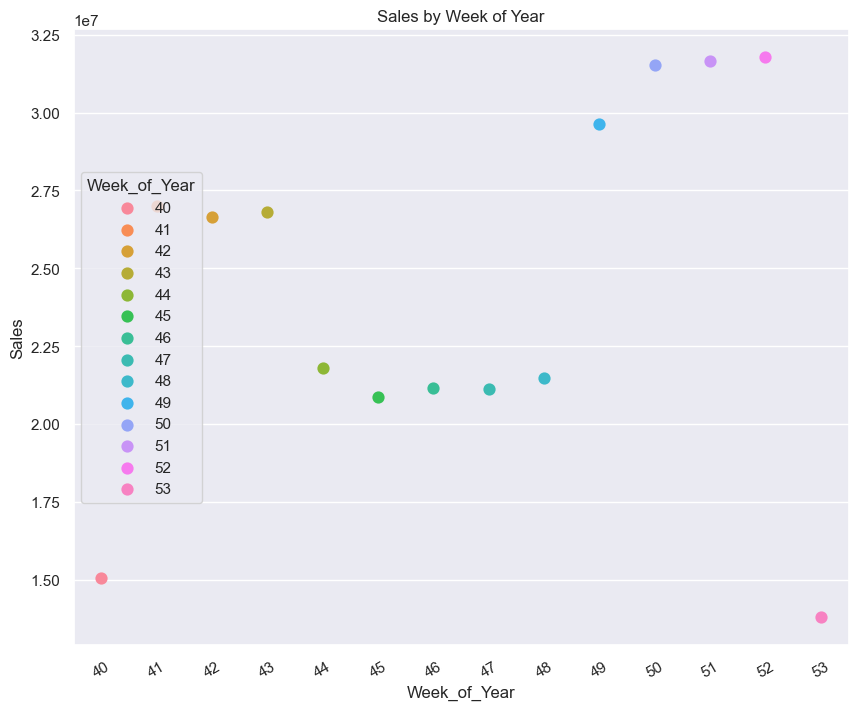

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Seaborn defining theme and style
sns.set_theme()
sns.set_style('darkgrid')

# Grouped by 'State' and 'Group' and calculating the sum of 'Sales'
grouped_data = df.groupby(['Week_of_Year'])['Sales'].sum().reset_index()
plt.figure(figsize=(10, 8))
#Barplotting the data.
plt.title('Sales by Week of Year')
plt.xlabel('State')
plt.ylabel('Sales')
plt.xticks(rotation=30)

ax = sns.pointplot(data=grouped_data, x='Week_of_Year', y='Sales', hue='Week_of_Year')
sns.move_legend(ax, "center left")
plt.show()


<h5><font color='green'><u> Inference from above chart: </u></font></h5>
<ul>
    <li>From the above plot, it appears that in <b> 52nd week </b> (i.e. Dec 21st 2020 to Dec 27th 2020), the sale was <b> highest </b>. This is the christmas week, so it is expected to people to purchase gifts. </li>
    <li>From the above plot, it appears that in <b> 53rd week </b> (i.e. Dec 28th 2020 to Jan 3rd 2021), the sale was <b> lowest </b>. Due to new year, shops could be closed causing sales to dip. </li> 
</ul>

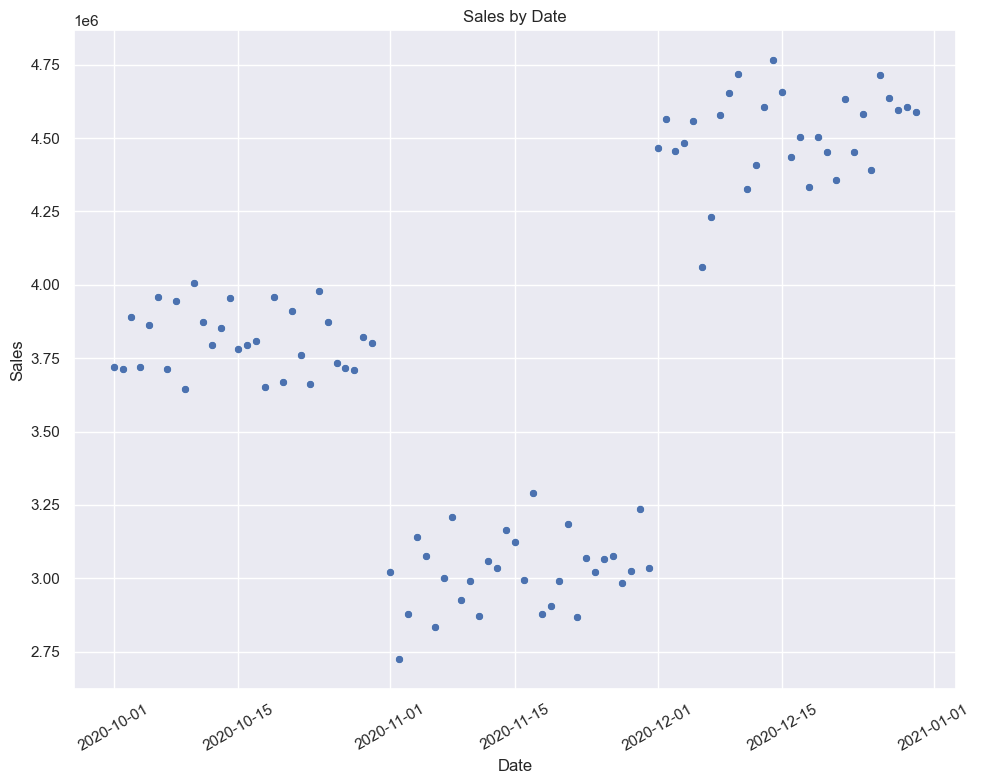

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Seaborn defining theme and style
sns.set_theme()
sns.set_style('darkgrid')
# Grouped by 'State' and 'Group' and calculating the sum of 'Sales'
plt.figure(figsize=(10, 8))
grouped_data = df.groupby(['Date'])['Sales'].sum().reset_index()

#Barplotting the data. 
sns.scatterplot(data=grouped_data, x='Date', y='Sales')

plt.title('Sales by Date')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=30)
#plt.legend(title='Group')
plt.tight_layout()
plt.show()

<h5><font color='green'><u> Inference from above chart: </u></font></h5>
<ul>
    <li>From the above chart, it appears the sales in <b> December </b> is <b> highest </b>. Followed by 'October' and 'November'. </li>
</ul>

In [117]:
#Pandas has describe funtion which gives stats of the different parameters
df.describe()

,Date,Unit,Sales,Sales_log,Month,Quarter,Week_of_Year
count,7560,7560.000000,7560.000000,7560.000000,7560.000000,7560.0,7560.0
mean,2020-11-15 04:00:00.000000256,18.005423,45013.558201,10.446010,11.000000,4.0,46.455556
min,2020-10-01 00:00:00,2.000000,5000.000000,8.517193,10.000000,4.0,40.0
25%,2020-10-23 00:00:00,8.000000,20000.000000,9.903488,10.000000,4.0,43.0
50%,2020-11-15 12:00:00,14.000000,35000.000000,10.463103,11.000000,4.0,46.5
75%,2020-12-08 00:00:00,26.000000,65000.000000,11.082143,12.000000,4.0,50.0
max,2020-12-30 00:00:00,65.000000,162500.000000,11.998433,12.000000,4.0,53.0
std,NaN,12.901403,32253.506944,0.767054,0.816551,0.0,3.786662


Sales of each day: 

          Date    Sales
0  2020-10-01  3720000
1  2020-10-02  3715000
2  2020-10-03  3890000
3  2020-10-04  3720000
4  2020-10-05  3862500
..        ...      ...
85 2020-12-26  4715000
86 2020-12-27  4637500
87 2020-12-28  4595000
88 2020-12-29  4607500
89 2020-12-30  4590000

[90 rows x 2 columns]


 Stats for Sales by days: 


count    9.000000e+01
mean     3.781139e+06
std      6.248873e+05
min      2.725000e+06
25%      3.086875e+06
50%      3.798750e+06
75%      4.428750e+06
max      4.765000e+06
Name: Sales, dtype: float64


 Plotting the chart for Sales by Days:


<Figure size 1000x800 with 0 Axes>

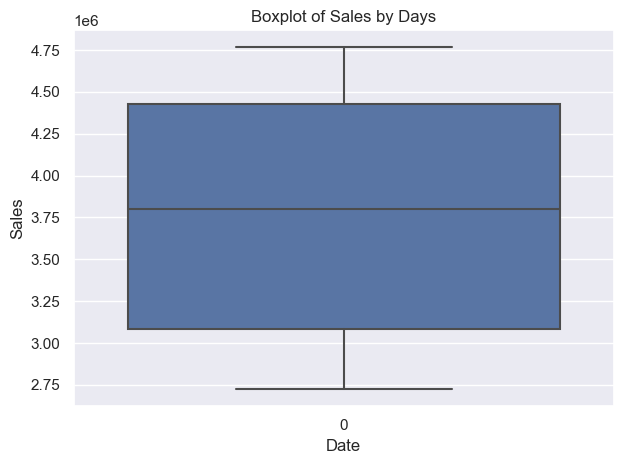



Maximum sales on day:
Date     2020-12-30 00:00:00
Sales                4765000
dtype: object


Minimum sales on day:
Date     2020-10-01 00:00:00
Sales                2725000
dtype: object


In [50]:
# Ploting the boxchart for Sales days
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Seaborn defining theme and style
sns.set_theme()
sns.set_style('darkgrid')
# Grouped by 'State' and 'Group' and calculating the sum of 'Sales'
plt.figure(figsize=(10, 8))
grouped_data = df.groupby(['Date'])['Sales'].sum().reset_index()
print("Sales of each day: \n\n", grouped_data)

#Stats for Sales by days:
print("\n\n Stats for Sales by days: \n\n")
print(grouped_data['Sales'].describe())

#Barplotting the data. 
plt.figure()
sns.boxplot(grouped_data['Sales'])

print("\n\n Plotting the chart for Sales by Days:")
plt.title('Boxplot of Sales by Days')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

#Day with maximum sales
print("\n\nMaximum sales on day:")
print(grouped_data[['Date', 'Sales']].max())

#Day with mimimum sales
print("\n\nMinimum sales on day:")
print(grouped_data[['Date', 'Sales']].min())

<h5><font color='green'><u> Inference from above chart: </u></font></h5>
<ul>
    <li> <b> The pandas stats and boxplot for sales matches. </b> The max, 75% (3rd quartile, Q3), 50% (i.e. 2nd quartile, Q2), 25% (i.e. 1st quartile, Q1) and min matches to the stat provided by pandas describe function. </li>
    <li><b>Maximum Sales</b> on day : <b> 2020-12-30</b></li>
    <li><b>Minimum Sales</b> on day : <b> 2020-10-01</b></li>
</ul>

<mark> Note: </mark>The dataset is the sales data for the 4th quarter of the year. Dataset for other quarter is not provided so could able to compare and study.

<h5><Center> -------- End of Project ----------- </center></h5>